        Importación de librerías

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.cm as cm

       Cargamos el dataset y lo analizamos

In [368]:
#Importamos el dataset
cars = pd.read_csv("ML_cars.csv")
cars.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [369]:
#Devuelve el número de elementos del array 
cars.shape

(205, 26)

In [370]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

    Realizando limpieza y transformación del dataset

In [371]:
# Cuenta valores nulos por columna
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [372]:
#Eliminamos las filas duplicadas
df = cars.drop_duplicates()

In [373]:
#Modificamos el nombre de las marcas mal escritas
cars[['Marca', 'Modelo']] = cars['CarName'].str.split(' ', n=1, expand=True)
errores = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
correctos = ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(errores, correctos))

# Realizar el reemplazo basado en el diccionario
cars['Marca'] = cars['Marca'].replace(dicMarca)

In [374]:
#Transformamos a numeros los datos con letras en las columnas cylindernumber y doornumber
cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [375]:
cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [376]:
#reemplazamos el numero de cilindros
cars.cylindernumber = cars.cylindernumber.str.lower()

def replace_name(a,b):
    cars.cylindernumber.replace(a,b,inplace=True)

replace_name('four','4')
replace_name('five','5')
replace_name('six','6')
replace_name('three','3')
replace_name('twelve','12')
replace_name("two", "2")
replace_name("eight","8")

cars.cylindernumber.unique().astype(int)

array([ 4,  6,  5,  3, 12,  2,  8])

In [377]:
#Reemplazamos el numero de puertas
cars.doornumber = cars.doornumber.str.lower()

def replace_name(a,b):
    cars.doornumber.replace(a,b,inplace=True)

replace_name("two", "2")
replace_name("four","4")

cars.doornumber.unique().astype(int)

array([2, 4])

         Analisis exploratorio de los datos

In [378]:
import warnings
warnings.filterwarnings("ignore")

In [379]:
# Visualización de estadísticas descriptivas básicas
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


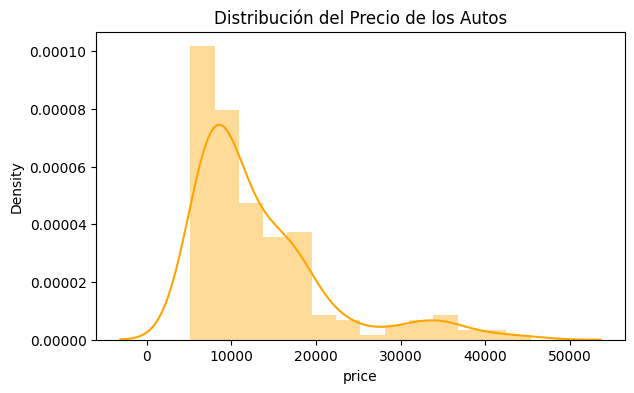

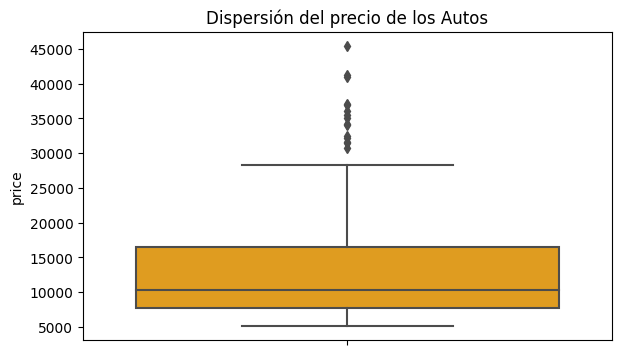

In [380]:
#Analizamos variables numericas
# Histograma de Precios
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('Distribución del Precio de los Autos')
sns.distplot(cars.price,color='orange' )
#Diagrama de caja, muestra la dispersión y la presencia de valores atípicos en los datos.
plt.figure(figsize=(15,4))
plt.subplot(1,2,2)
plt.title('Dispersión del precio de los Autos')
sns.boxplot(y=cars.price, color='orange')

plt.show()

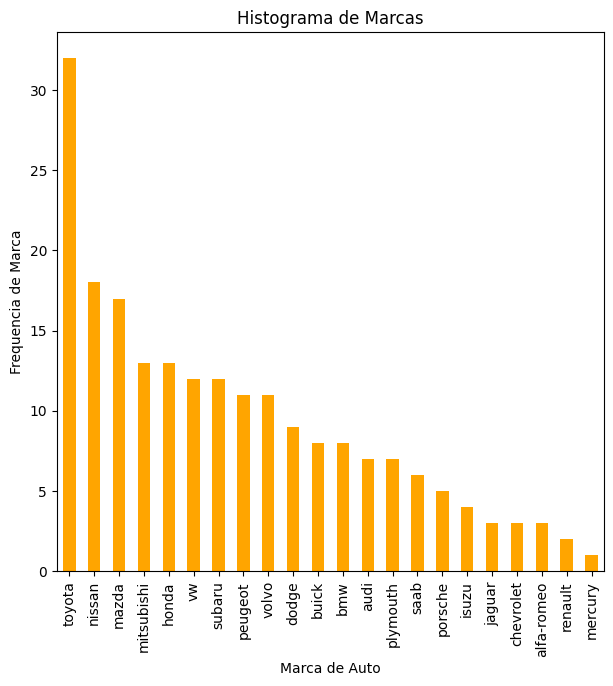

In [381]:
#Analizamos variables categoricas
plt.figure(figsize=(24, 7))

plt.subplot(1,3,1)
plt1 = cars.Marca.value_counts().plot(kind='bar', color='orange')
plt.title('Histograma de Marcas')
plt1.set(xlabel = 'Marca de Auto', ylabel='Frequencia de Marca')
plt.show()

<Figure size 1000x600 with 0 Axes>

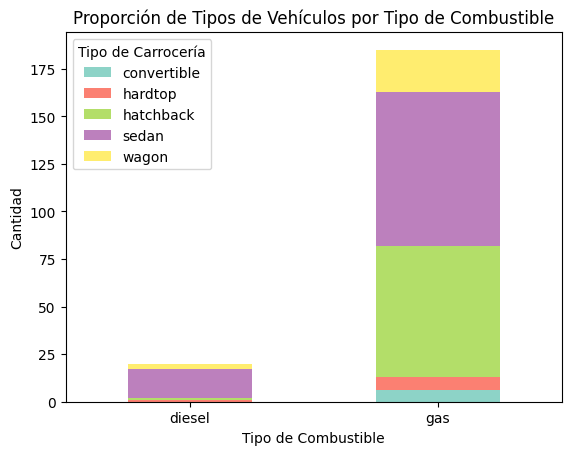

In [382]:
contingency_table = pd.crosstab(df['fueltype'], df['carbody'])

# Creamos un gráfico de barras apiladas para el tipo de autos por tipo de combustible
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proporción de Tipos de Vehículos por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # evita la rotación de las etiquetas del eje x
plt.legend(title='Tipo de Carrocería')
plt.show()

<Figure size 1000x600 with 0 Axes>

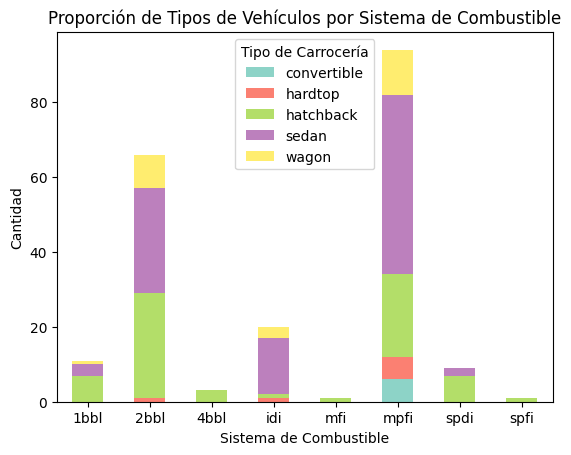

In [383]:

contingency_table = pd.crosstab(df['fuelsystem'], df['carbody'])
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Proporción de Tipos de Vehículos por Sistema de Combustible')
plt.xlabel('Sistema de Combustible')
plt.ylabel('Cantidad')
plt.xticks(rotation=0) 
plt.legend(title='Tipo de Carrocería')
plt.show()

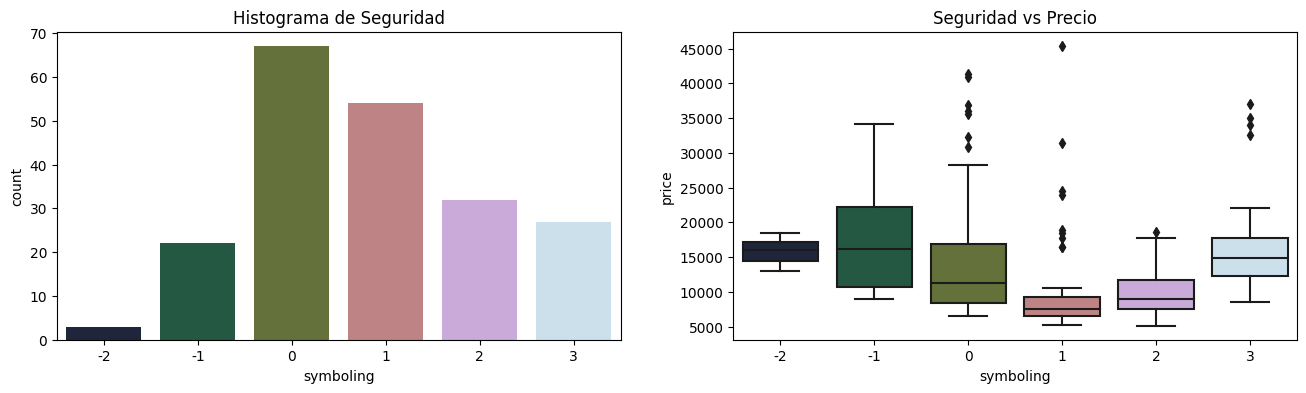

In [384]:
#Creamos un histograma para evaluar la seguridad y el precio del auto
plt.figure(figsize=(16, 4))

plt.subplot(1,2,1)
plt.title('Histograma de Seguridad')
sns.countplot(data = cars, x = 'symboling', palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Seguridad vs Precio')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

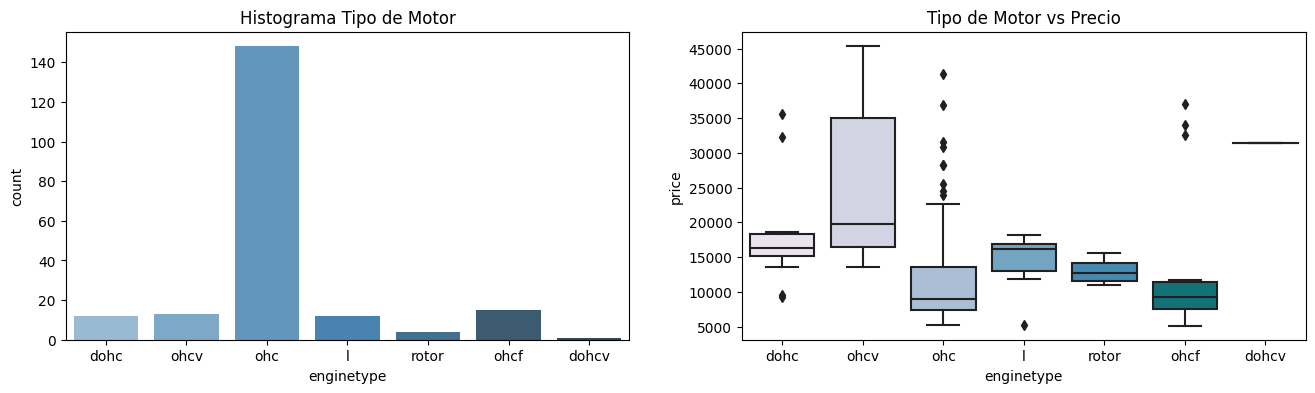

In [385]:
#Creamos un histograma para el tipo de motor y otro para ver su relacion con el precio
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Histograma Tipo de Motor')
sns.countplot(data = cars, x = 'enginetype', palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Tipo de Motor vs Precio')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()


       Preparación de Datos para la generación de modelos
Creación de dummies

In [386]:
#creamos variables categóricas para luego transformar en dummies 
variables_categoricas = ["Marca", "fueltype",'aspiration','carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

In [387]:
variables_categoricas

['Marca',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [388]:
#Creamos dummies (toma como valor 0 o 1 para indicar la presencia o ausencia de algún atributo categórico)
df_Cars = pd.get_dummies(cars, columns= variables_categoricas,
                        drop_first= False, dtype=int)


In [389]:
df_Cars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,109.1,188.8,68.9,55.5,2952,4,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo 144ea,4,109.1,188.8,68.8,55.5,3049,4,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo 244dl,4,109.1,188.8,68.9,55.5,3012,6,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,volvo 246,4,109.1,188.8,68.9,55.5,3217,6,...,0,0,0,0,0,1,0,0,0,0


             Modelamiento y evaluación

      Modelo de regresión lineal

In [390]:
from sklearn.linear_model import LinearRegression # Importamos el módulo que contiene el algorimto de
                                                  #regresión lineal

In [391]:
linear_model = LinearRegression() # Instanciamos un objeto de la clase LinearRegression.
                                  #Aquí estamos creando nuestro modelo predictivo 'linear_model'

In [392]:
#acá comenzamos a crear las variables features (X) y las variables objetivo (y)

feature_cols=['symboling', 'doornumber', 
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 
       'Marca_alfa-romeo', 'Marca_audi', 'Marca_bmw', 'Marca_buick',
       'Marca_chevrolet', 'Marca_dodge', 'Marca_honda', 'Marca_isuzu',
       'Marca_jaguar', 'Marca_mazda', 'Marca_mercury', 'Marca_mitsubishi',
       'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth', 'Marca_porsche',
       'Marca_renault', 'Marca_saab', 'Marca_subaru', 'Marca_toyota',
       'Marca_volvo', 'Marca_vw', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']
X= df_Cars[feature_cols]
y= df_Cars.price

In [393]:
#Entrenamos al modelo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 
linear_model = LinearRegression()
linear_model.fit(X, y)


from sklearn import metrics

y_pred=linear_model.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1263.4663883401893
MSE: 3777743.0969140343
RMSE: 1943.6417100160293
R2: 0.9454748217039052


In [394]:
def modelo_reg (y, y_pred):
    plt.figure (figsize=(12, 6))
# Scatter plot    
    plt.subplot (1, 2, 1)
    plt.scatter (y_pred, y)
    plt.xlabel ("Predicciones del modelo")
    plt.ylabel ("Valor real")  
    plt.plot ([0, np.max(y) + 2*np.min(y)], [0, np.max(y) + 2*np.min(y)], '-', color = "r")
#  Displot   
    plt.subplot (1, 2, 2)
    sns.distplot (y, hist = False, color = "r", label = "Valor real")
    sns.distplot (y_pred, hist = False, color = "b", label = "Predicciones del modelo", axlabel="Distribucion")
    plt.legend()
    plt.show()

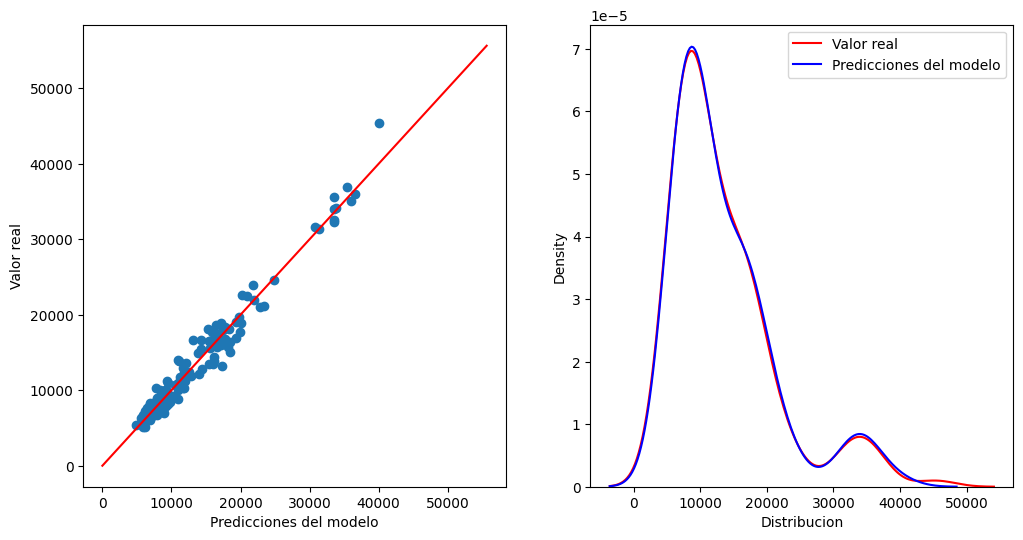

In [395]:
modelo_reg (y_train, linear_model.predict (X_train))

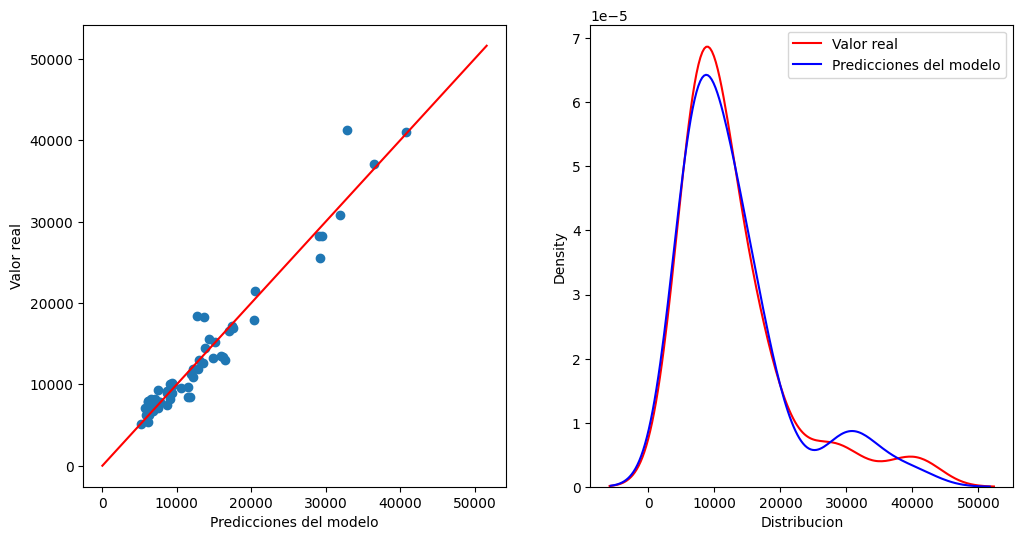

In [396]:
modelo_reg (y_test, linear_model.predict (X_test))

Validación cruzada

In [397]:
#evaluamos la capacidad de generalización del modelo.
#importamos
from sklearn.model_selection import cross_val_score

# Realizamos validación cruzada con 5 divisiones 
scores = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convertimos los puntajes negativos de MSE a RMSE
rmse_scores = np.sqrt(-scores)

# Imprimimos los resultados de la validación cruzada
print("RMSE Scores:", rmse_scores)
print("RMSE Mean:", rmse_scores.mean())

RMSE Scores: [5300.06417571 4994.87284531 5227.35026157 5462.57853301 5556.09921209]
RMSE Mean: 5308.193005537558


In [398]:
# Obtenemos los coeficientes de regresión
coeficientes = linear_model.coef_

In [399]:
# Creamos un diccionario que mapee características a sus coeficientes
coef_dict = {}
for coef, feat in zip(coeficientes, feature_cols):
    coef_dict[feat] = coef

# Ordenamos las características por importancia (coeficientes)
sorted_features = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Imprimimos las características ordenadas por importancia
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

Marca_bmw: 8265.828566066337
Marca_peugeot: -6634.188264808124
enginetype_rotor: 6599.171286699531
Marca_porsche: 6525.347133486344
Marca_buick: 4638.22418811505
boreratio: -4235.775190725332
enginetype_ohcv: -4135.370922310855
fueltype_diesel: 3290.308494398158
fueltype_gas: -3290.308494398156
fuelsystem_idi: 3290.308494398154
Marca_saab: 3226.818993605565
Marca_mitsubishi: -3207.3343928494496
Marca_plymouth: -2985.2628519431255
enginelocation_front: -2956.395745843337
enginelocation_rear: 2956.395745843328
Marca_renault: -2717.8773577726356
Marca_subaru: -2700.2404513993824
Marca_dodge: -2661.967329770068
carbody_convertible: 2546.145416985434
enginetype_ohc: -2360.6999099481777
enginetype_l: 2306.846237846999
enginetype_dohc: -2219.362273759136
Marca_chevrolet: -2175.7370273328897
fuelsystem_4bbl: -2121.5128705961883
fuelsystem_1bbl: -1896.8068990595834
Marca_nissan: -1327.9390627816063
Marca_audi: 1264.0159651280987
aspiration_turbo: 1220.2988463327824
aspiration_std: -1220.2988463

        

            Diferenciamos los  autos de alta y baja gama separandalos a través de la mediana

In [400]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [401]:
#buscamos la mediana de la variable precio

median_price = df_Cars['price'].median()                    

In [402]:
#separamos el dataset por alta (valor 1) y baja gama (valor 0)
df_Cars['Gama'] = df_Cars['price'].apply(lambda x: '1' if x > median_price else '0')

In [403]:
#Lo convertimos a flotante para poder trabajarlo
df_Cars['Gama']= df_Cars['Gama'].astype(float)

In [404]:
#evaluamos si se hizo correctamente la columna 'Gama'
df_Cars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Gama
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,1,0,0,1.0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,1,0,0,1.0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,0,0,1,0,0,1.0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,1,0,0,1.0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,109.1,188.8,68.9,55.5,2952,4,...,0,0,0,0,0,0,1,0,0,1.0
201,202,-1,volvo 144ea,4,109.1,188.8,68.8,55.5,3049,4,...,0,0,0,0,0,0,1,0,0,1.0
202,203,-1,volvo 244dl,4,109.1,188.8,68.9,55.5,3012,6,...,0,0,0,0,0,0,1,0,0,1.0
203,204,-1,volvo 246,4,109.1,188.8,68.9,55.5,3217,6,...,0,0,0,0,1,0,0,0,0,1.0


          Modelo de regresión logística

In [405]:
# Dividimos los datos en características (X) y variable objetivo (y)
X = df_Cars[feature_cols]
y = df_Cars['Gama']

In [406]:
#Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [407]:
# Creamos un modelo de clasificación (Regresión Logística)
model = LogisticRegression()

In [408]:
# Entrenamos el modelo
model.fit(X_train, y_train)

LogisticRegression()

In [409]:
# Realizamos predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


Resultados

In [427]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [410]:
print("Exactitud (Accuracy): {:.2f}%".format(accuracy * 100))

Exactitud (Accuracy): 97.56%


In [411]:
confusion


array([[22,  1],
       [ 0, 18]], dtype=int64)

In [412]:
report

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.96      0.98        23\n         1.0       0.95      1.00      0.97        18\n\n    accuracy                           0.98        41\n   macro avg       0.97      0.98      0.98        41\nweighted avg       0.98      0.98      0.98        41\n'

            Modelos de clasificación

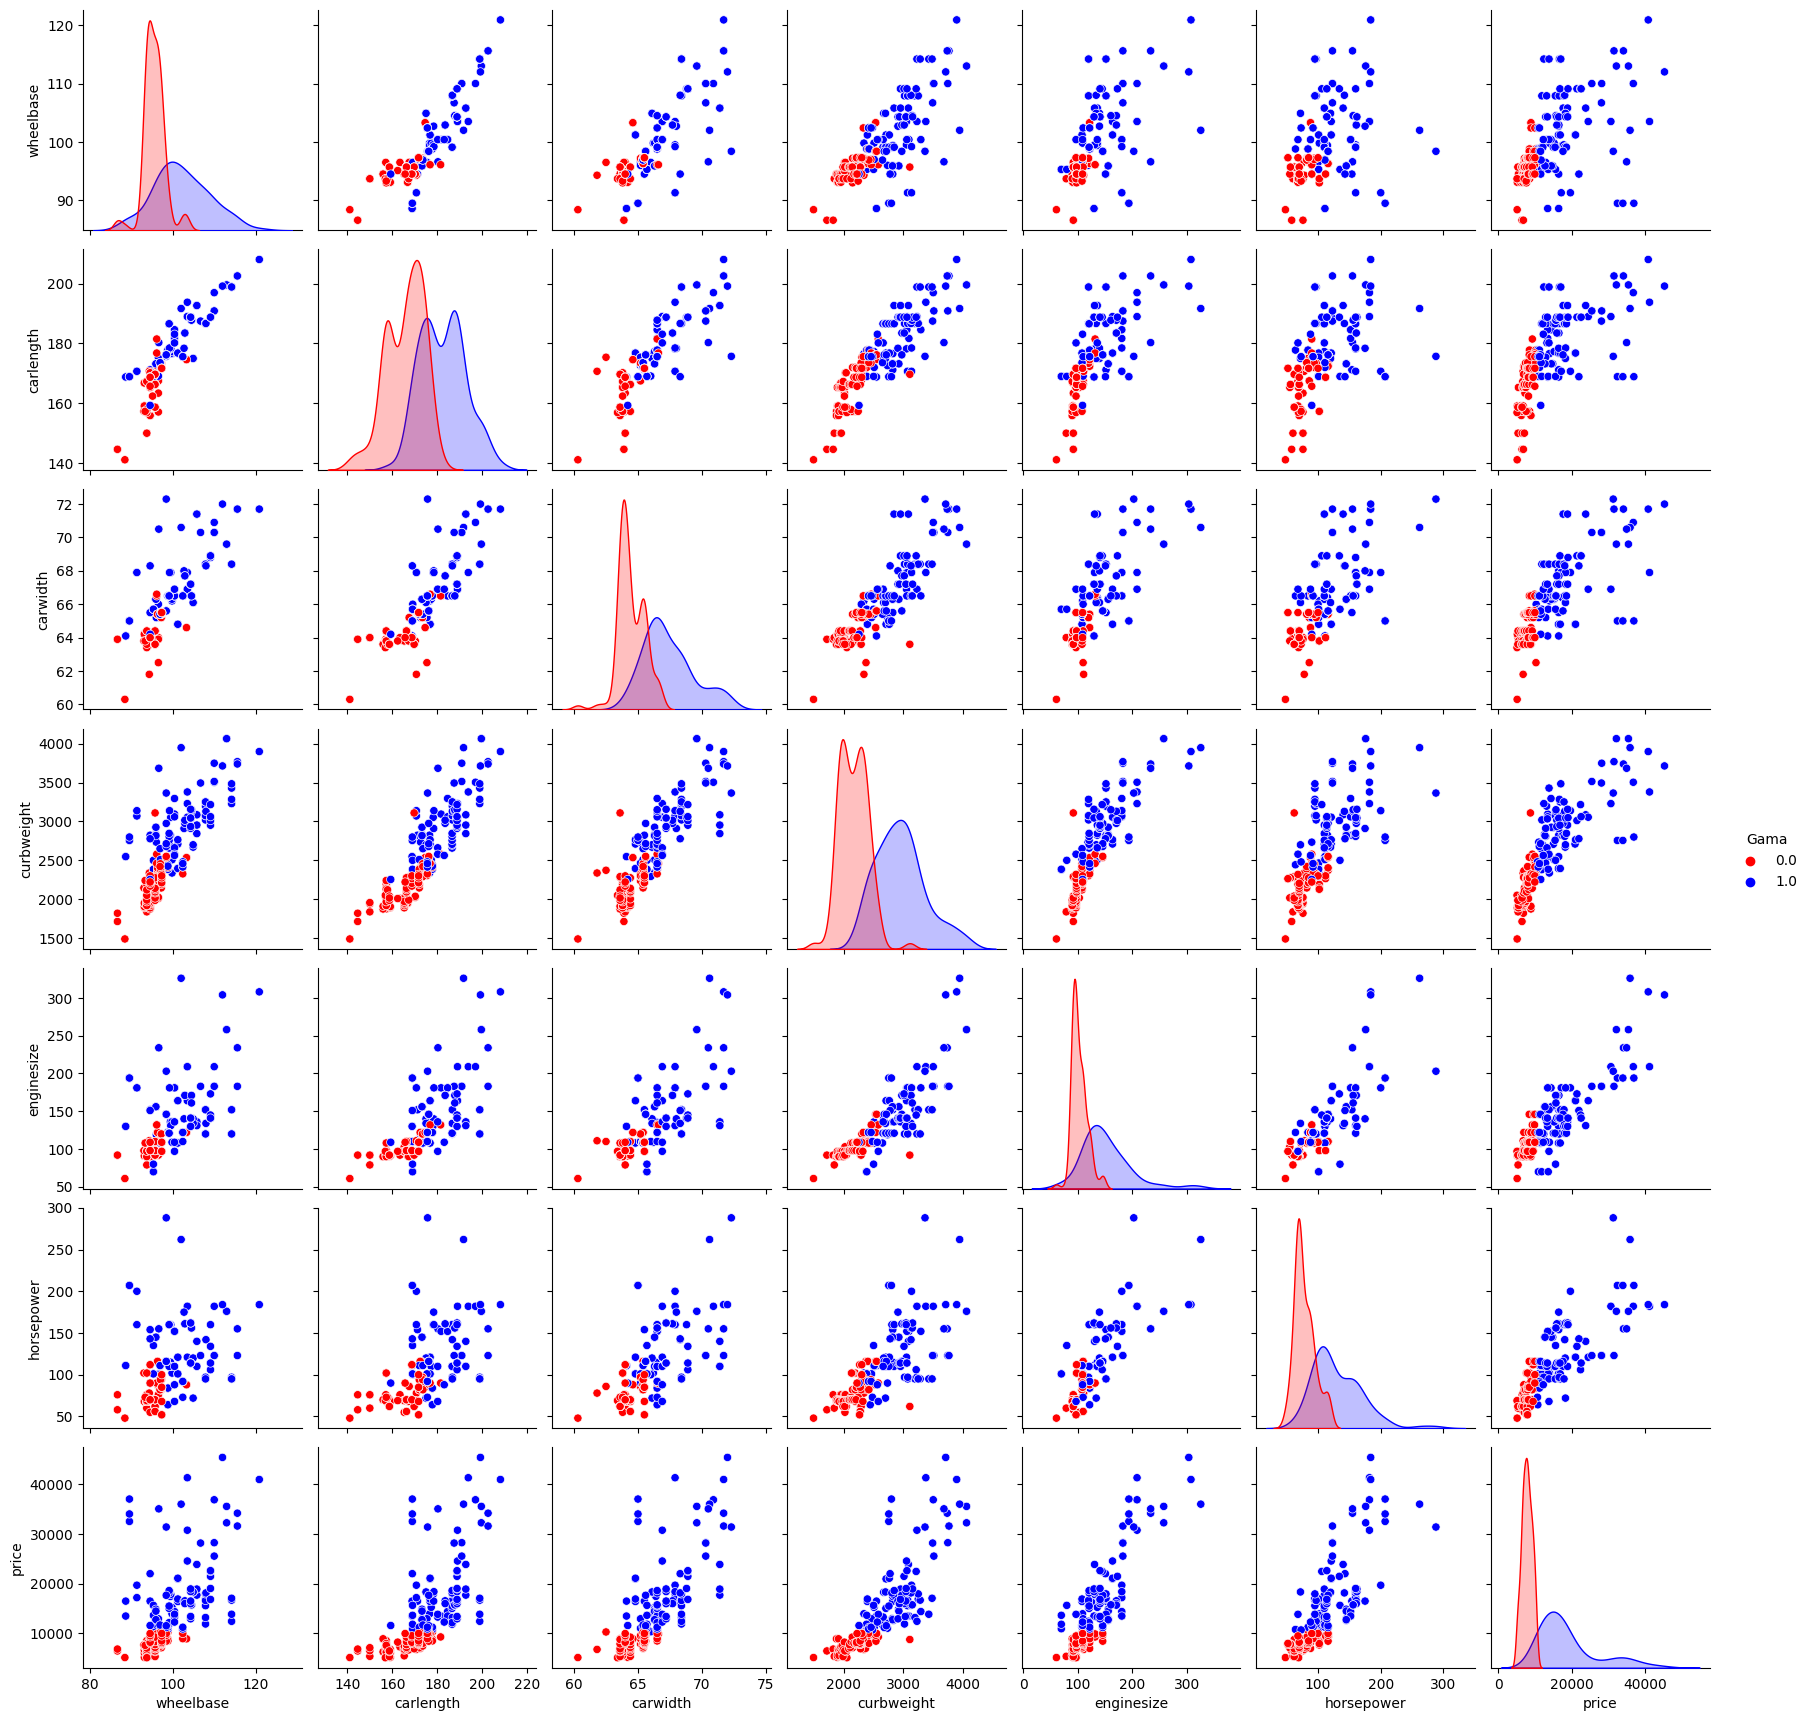

In [413]:
#Relación entre Variables Cuantitativas y Gama (Asumiendo que 1 es alta y 0 es baja)/ Pairplot
sns.pairplot(df_Cars, hue='Gama', palette=['red', 'blue' ],vars=['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'price'])
plt.show()

  Árbol de decisión

In [414]:
X.head

<bound method NDFrame.head of      symboling doornumber  carlength  carwidth  carheight  curbweight  \
0            3          2      168.8      64.1       48.8        2548   
1            3          2      168.8      64.1       48.8        2548   
2            1          2      171.2      65.5       52.4        2823   
3            2          4      176.6      66.2       54.3        2337   
4            2          4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1          4      188.8      68.9       55.5        2952   
201         -1          4      188.8      68.8       55.5        3049   
202         -1          4      188.8      68.9       55.5        3012   
203         -1          4      188.8      68.9       55.5        3217   
204         -1          4      188.8      68.9       55.5        3062   

    cylindernumber  enginesize  boreratio  stroke  ...  enginetype_ohcv  \
0                4

In [415]:
y.tail

<bound method NDFrame.tail of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
200    1.0
201    1.0
202    1.0
203    1.0
204    1.0
Name: Gama, Length: 205, dtype: float64>

In [416]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#Dividimos los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciamos un objeto de la clase DecisionTreeClassifier

# max_depth --> define la profundidad que tendrá nuestro árbol

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)


In [417]:
# Entrenamos el modelo
clf.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [418]:
# Exploramos algunas de las características del modelo entrenado

print(clf.classes_)


[0. 1.]


In [419]:
print(clf.n_classes_)


2


In [420]:
print(clf.max_features_)


66


In [421]:
print(clf.feature_importances_)

[0.         0.         0.         0.03341452 0.         0.73700795
 0.         0.         0.         0.         0.         0.01826398
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0484701  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02698708
 0.         0.02435198 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11150439
 0.         0.         0.         0.         0.         0.        ]


In [422]:
# Predecimos

y_pred = clf.predict(X.values) 
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [423]:
#Ahora evaluamos nuestro modelo de clasificación

print(accuracy_score(y,y_pred))

0.9609756097560975


In [424]:
confusion

array([[22,  1],
       [ 0, 18]], dtype=int64)

Visualización del árbol

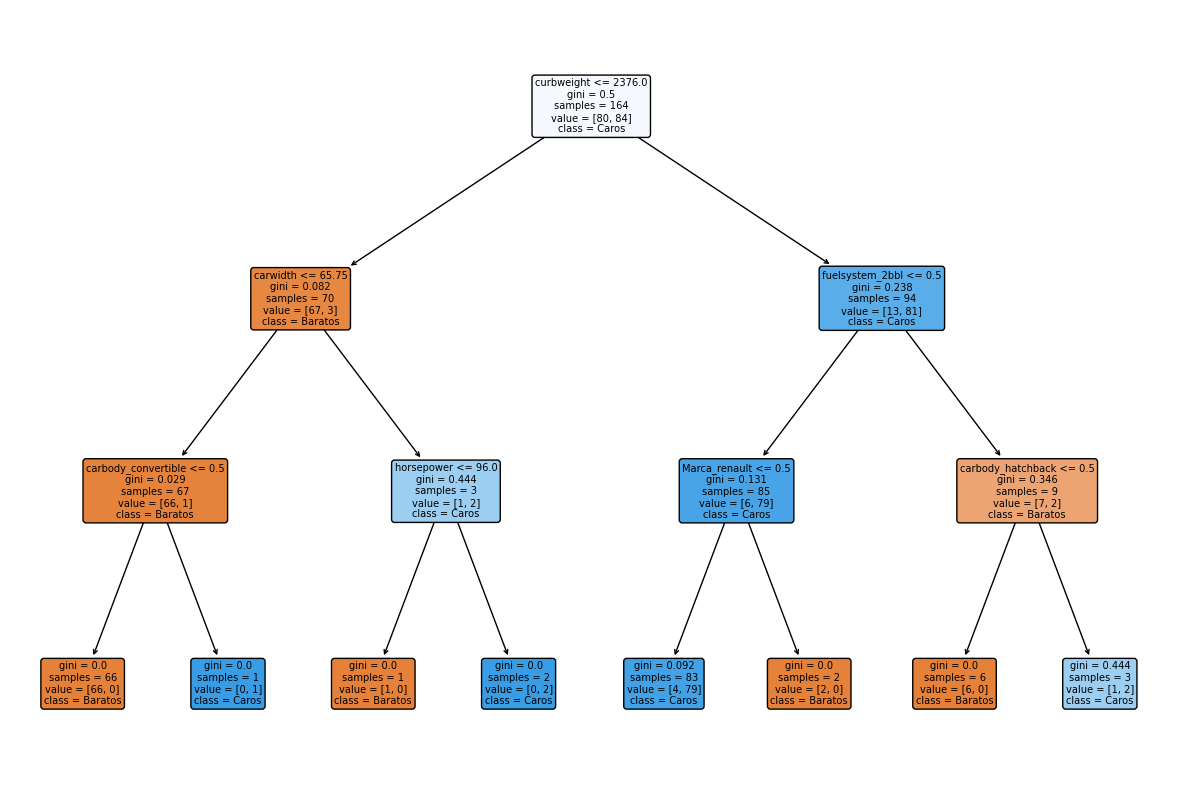

In [425]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=feature_cols, filled=True, rounded=True, class_names=["Baratos", "Caros"])
plt.show()

Análisis de importancia de las características

In [426]:
#Esto nos indica qué características son más importantes para la toma de decisiones del modelo

feature_importances = clf.feature_importances_
for feature, importance in zip(feature_cols, feature_importances):
    print(f"{feature}: {importance}")

symboling: 0.0
doornumber: 0.0
carlength: 0.0
carwidth: 0.03341452053703154
carheight: 0.0
curbweight: 0.737007949736989
cylindernumber: 0.0
enginesize: 0.0
boreratio: 0.0
stroke: 0.0
compressionratio: 0.0
horsepower: 0.018263982439097697
peakrpm: 0.0
citympg: 0.0
highwaympg: 0.0
Marca_alfa-romeo: 0.0
Marca_audi: 0.0
Marca_bmw: 0.0
Marca_buick: 0.0
Marca_chevrolet: 0.0
Marca_dodge: 0.0
Marca_honda: 0.0
Marca_isuzu: 0.0
Marca_jaguar: 0.0
Marca_mazda: 0.0
Marca_mercury: 0.0
Marca_mitsubishi: 0.0
Marca_nissan: 0.0
Marca_peugeot: 0.0
Marca_plymouth: 0.0
Marca_porsche: 0.0
Marca_renault: 0.048470098257579815
Marca_saab: 0.0
Marca_subaru: 0.0
Marca_toyota: 0.0
Marca_volvo: 0.0
Marca_vw: 0.0
fueltype_diesel: 0.0
fueltype_gas: 0.0
aspiration_std: 0.0
aspiration_turbo: 0.0
carbody_convertible: 0.026987078529412987
carbody_hardtop: 0.0
carbody_hatchback: 0.024351976585463595
carbody_sedan: 0.0
carbody_wagon: 0.0
drivewheel_4wd: 0.0
drivewheel_fwd: 0.0
drivewheel_rwd: 0.0
enginelocation_front: 0.